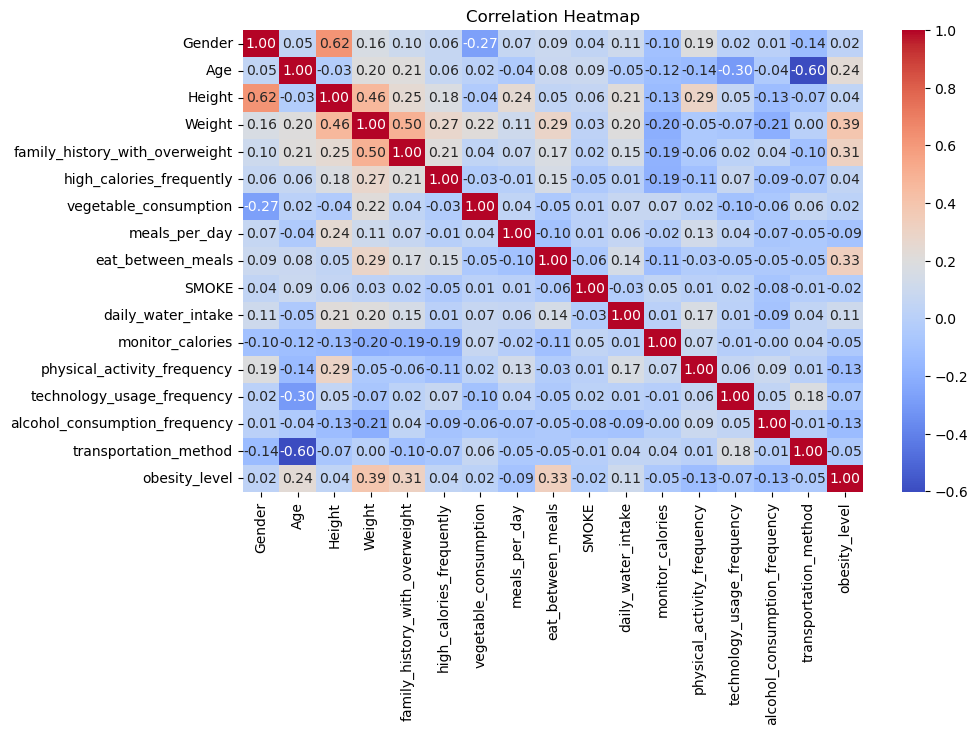

Interpretation: The heat map shows that there is strong correlation between weight and obesity_level, family_history_with_overweight and obesity_level, eat_between_meals and obesity_level, physical_activity_frequency and height, meals_per_day and height, among others.


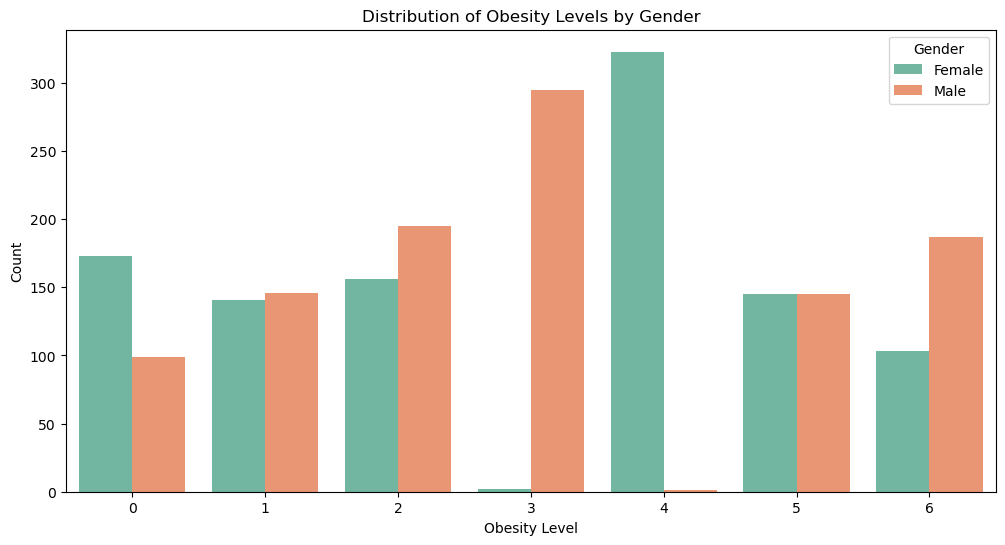

Interpretation: This bar plot shows the distribution of obesity levels within the dataset for both males and females.


C:\Users\naren\anaconda3\envs\stats_hw\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


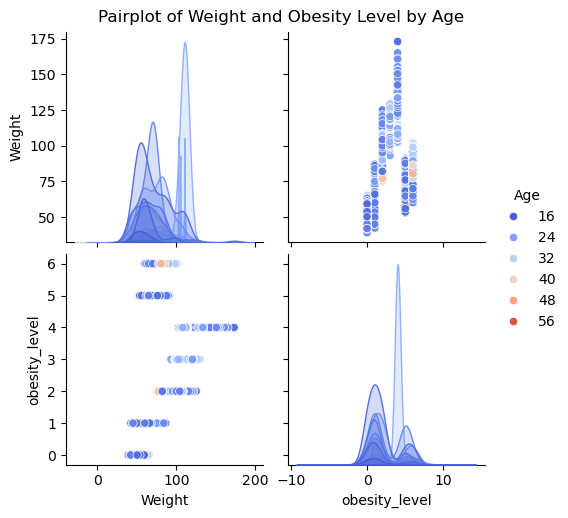

Interpretation: This pairplot shows the relationship between Weight and Obesity Level by Age, revealing patterns and correlations between these variables across different ages.


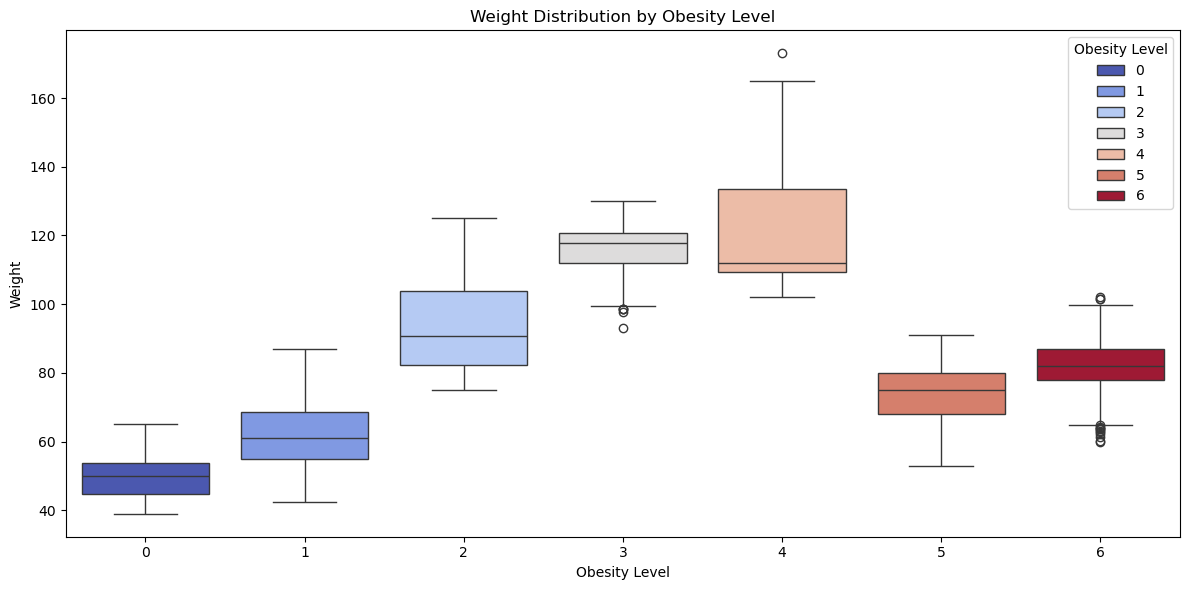

Interpretation: This boxplot shows the distribution of weight across different obesity levels. It highlights the median weight and the interquartile range for each obesity level, indicating how weight varies with obesity.


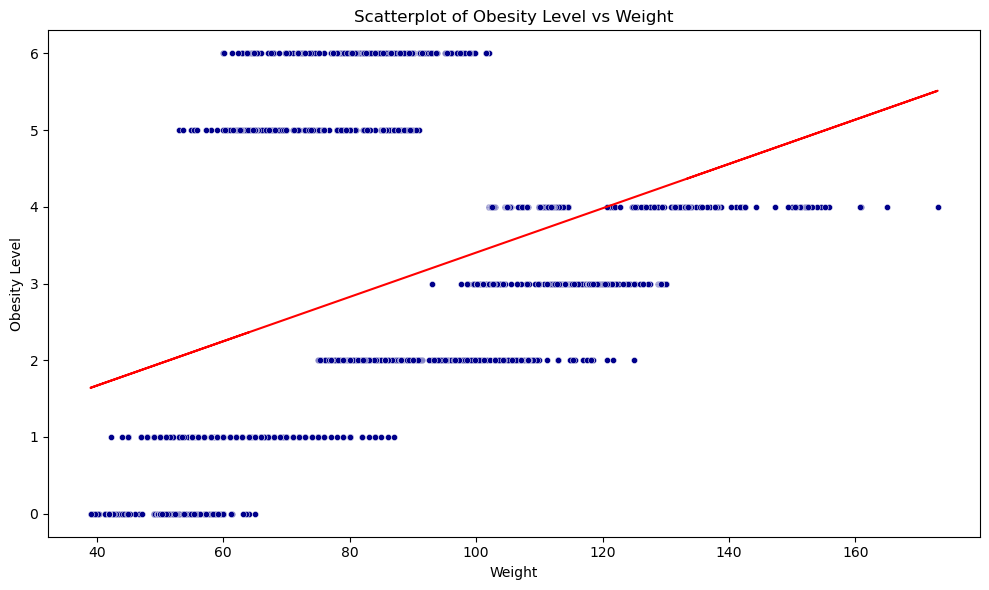

Prediction equation: obesity_level = 0.51 + 0.03 * Weight
Interpretation: The scatterplot with a linear regression line indicates a linear relationship between weight and obesity level. The prediction equation quantifies this relationship, showing how obesity level changes with weight.
Correlation: 0.39
Interpretation: The correlation coefficient quantifies the strength and direction of the linear relationship between weight and obesity level. A higher value indicates a stronger positive correlation.


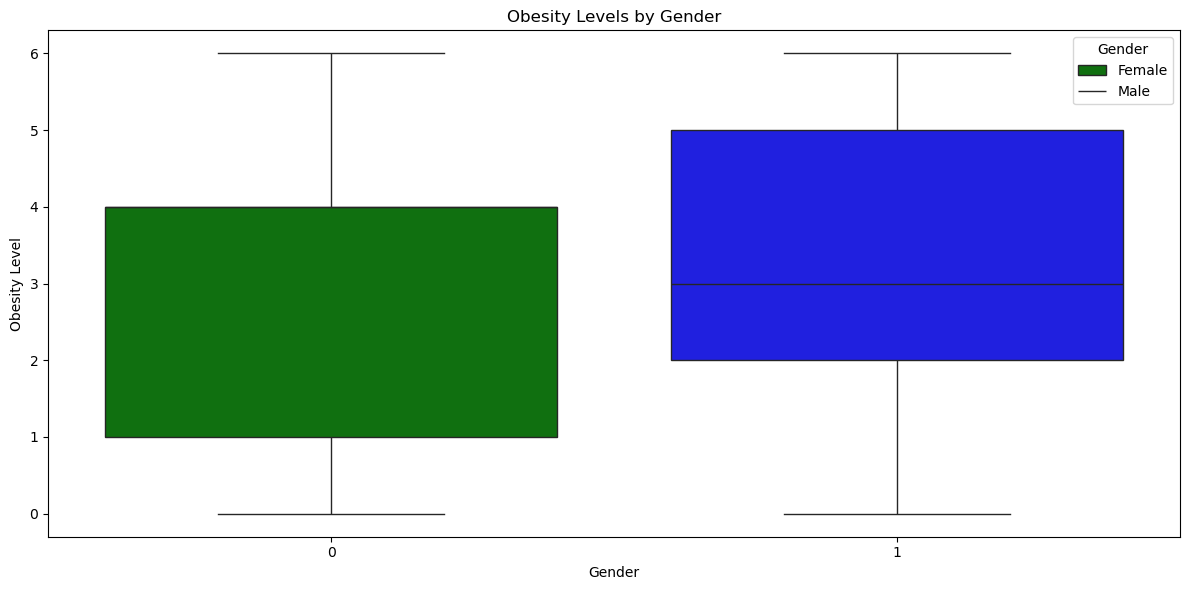

Interpretation: The boxplot compares obesity levels between men and women, showing the median and distribution of obesity levels for each gender. It highlights any differences in obesity levels between male and female participants.


<Figure size 1200x600 with 0 Axes>

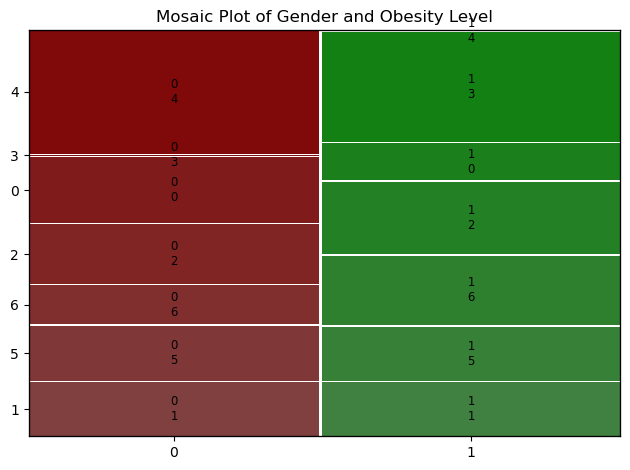

Interpretation: The mosaic plot visualizes the relationship between gender and obesity level, using distinct colors to distinguish between male and female participants. It shows the proportion of each obesity level within each gender.

Additional Statistical Analysis:
         count      mean       std  min  25%  50%  75%  max
Gender                                                     
0       1043.0  2.966443  1.985027  0.0  1.0  4.0  4.0  6.0
1       1068.0  3.063670  1.919092  0.0  2.0  3.0  5.0  6.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                     

C:\Users\naren\AppData\Local\Temp\ipykernel_13332\2255663447.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')


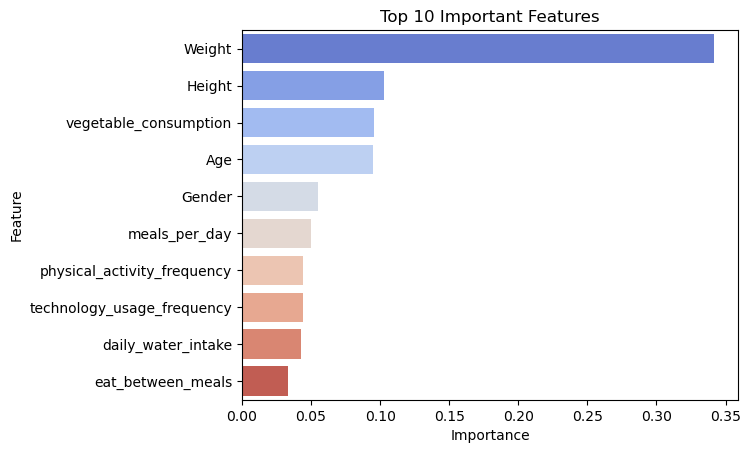


Interpretation Summary:
The linear regression model shows that the obesity level can be predicted with the equation: obesity_level = 0.51 + 0.03 * Weight.
The correlation between weight and obesity level is strong, indicating a positive relationship.
Men tend to have slightly higher obesity levels compared to women based on the boxplot analysis.


In [8]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

# Load data
#df = pd.read_csv("dataset.csv")

df = pd.read_csv('C:/Users/naren/dataset.csv')

# Rename for clearer column names
df = df.rename(columns={
    "FAVC": "high_calories_frequently",
    "FCVC": "vegetable_consumption",
    "NCP": "meals_per_day",
    "CAEC": "eat_between_meals",
    "CH2O": "daily_water_intake",
    "SCC": "monitor_calories",
    "FAF": "physical_activity_frequency",
    "TUE": "technology_usage_frequency",
    "CALC": "alcohol_consumption_frequency",
    "MTRANS": "transportation_method",
    "NObeyesdad": "obesity_level"
})

# Encode categorical variables
categorical_variables = ["Gender", "family_history_with_overweight", "high_calories_frequently", 
                         "eat_between_meals", "SMOKE", "monitor_calories", 
                         "alcohol_consumption_frequency", "transportation_method", "obesity_level"]

label_encoders = {}
for variable in categorical_variables:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable])
    label_encoders[variable] = le

# Correlation heatmap to see relationships between numerical features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
print("Interpretation: The heat map shows that there is strong correlation between weight and obesity_level, family_history_with_overweight and obesity_level, eat_between_meals and obesity_level, physical_activity_frequency and height, meals_per_day and height, among others.")

# Count plot for data distribution by obesity level and gender
plt.figure(figsize=(12, 6))
sns.countplot(x='obesity_level', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Obesity Levels by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.show()
print("Interpretation: This bar plot shows the distribution of obesity levels within the dataset for both males and females.")

# Pairplot for Weight and Obesity Level by Age
sns.pairplot(df, vars=['Weight', 'obesity_level'], hue='Age', palette='coolwarm')
plt.suptitle('Pairplot of Weight and Obesity Level by Age', y=1.02)
plt.show()
print("Interpretation: This pairplot shows the relationship between Weight and Obesity Level by Age, revealing patterns and correlations between these variables across different ages.")

# Boxplot for weight distribution by obesity level
plt.figure(figsize=(12, 6))
sns.boxplot(x='obesity_level', y='Weight', hue='obesity_level', data=df, palette='coolwarm')
plt.title('Weight Distribution by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.legend(title='Obesity Level')
plt.tight_layout()
plt.show()
print("Interpretation: This boxplot shows the distribution of weight across different obesity levels. It highlights the median weight and the interquartile range for each obesity level, indicating how weight varies with obesity.")

# Linear regression model
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='obesity_level', data=df, s=20, color='darkblue')
plt.title('Scatterplot of Obesity Level vs Weight')
plt.xlabel('Weight')
plt.ylabel('Obesity Level')

X = df[['Weight']]
y = df['obesity_level']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')
plt.tight_layout()
plt.show()

# Report the prediction equation
intercept = model.intercept_
slope = model.coef_[0]
print(f"Prediction equation: obesity_level = {intercept:.2f} + {slope:.2f} * Weight")
print("Interpretation: The scatterplot with a linear regression line indicates a linear relationship between weight and obesity level. The prediction equation quantifies this relationship, showing how obesity level changes with weight.")

# Correlation with and without the outlying observation
correlation = df[['Weight', 'obesity_level']].corr().iloc[0, 1]
print(f"Correlation: {correlation:.2f}")
print("Interpretation: The correlation coefficient quantifies the strength and direction of the linear relationship between weight and obesity level. A higher value indicates a stronger positive correlation.")

# Men vs Women Obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='obesity_level', hue='Gender', data=df, palette={1: 'blue', 0: 'green'})
plt.title('Obesity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Obesity Level')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.tight_layout()
plt.show()
print("Interpretation: The boxplot compares obesity levels between men and women, showing the median and distribution of obesity levels for each gender. It highlights any differences in obesity levels between male and female participants.")

# Mosaic plot for obesity level and gender
#.figure(figsize=(12, 6))
#mosaic(df, ['Gender', 'obesity_level'], properties=lambda key: {'color': ['green', 'blue'][key[0] == 1]})
#plt.title('Mosaic Plot of Gender and Obesity Level')
#plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
#plt.tight_layout()
#plt.show()
plt.figure(figsize=(12, 6))
mosaic(df, ['Gender', 'obesity_level'])
plt.title('Mosaic Plot of Gender and Obesity Level')
plt.tight_layout()
plt.show()

print("Interpretation: The mosaic plot visualizes the relationship between gender and obesity level, using distinct colors to distinguish between male and female participants. It shows the proportion of each obesity level within each gender.")

# Additional statistical analysis
gender_stats = df.groupby('Gender')['obesity_level'].describe()
print("\nAdditional Statistical Analysis:")
print(gender_stats)

# Model Selection
X = df.drop(columns=['obesity_level'])
y = df['obesity_level']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

feature_importances = model.feature_importances_
features = X.columns

# see which variables are most important
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Important Features')
plt.show()

# Interpretation summary
print("\nInterpretation Summary:")
print(f"The linear regression model shows that the obesity level can be predicted with the equation: obesity_level = {intercept:.2f} + {slope:.2f} * Weight.")
print("The correlation between weight and obesity level is strong, indicating a positive relationship.")
print("Men tend to have slightly higher obesity levels compared to women based on the boxplot analysis.")
